<a href="https://colab.research.google.com/github/JacquelineDiazdeleon/Visualizaci-n-de-Datos/blob/main/Netflix_Actualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn plotly
!pip install --upgrade pandas seaborn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade pandas seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JacquelineDiazdeleon/Visualizaci-n-de-Datos/main/NetFlix.csv", sep = ',')
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [5]:
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError as e:
   df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

print (df['date_added'])

0      2020-08-14
1      2017-12-15
2      2019-01-05
3      2016-03-01
4      2018-12-03
          ...    
7782   2019-07-12
7783   2020-09-01
7784   2016-08-26
7785   2019-03-08
7786   2016-12-06
Name: date_added, Length: 7787, dtype: datetime64[ns]


<ipython-input-5-d50b43f7646f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [6]:
print(df['date_added'].head())
print(df['date_added'].isnull().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


Rating

In [7]:
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [8]:
df['rating_numeric'] = df['rating'].map(rating_map)

In [9]:
print(df[["rating", "rating_numeric"]].head())
print(df["rating_numeric"].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7685.000000
mean        3.154066
std         0.936116
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


Estadistica

Descriptiva

In [10]:
numeric_columns = ["release_year", "duration", "rating_numeric"]
print("Estadísticas descriptivas de las columnas numéricas:")
print(df[numeric_columns].describe())

Estadísticas descriptivas de las columnas numéricas:
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7685.000000
mean    2013.932580    69.122769        3.154066
std        8.757395    50.950743        0.936116
min     1925.000000     1.000000        1.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


In [11]:
df['rating_numeric'] = df['rating'].map(rating_map).fillna(0)

print(df[['rating', 'rating_numeric']].head())

print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7787.000000
mean        3.112752
std         0.996720
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


Medidas de tendencia

In [12]:
print("\nMedidas de tendencia central para las variables numericas: ")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean()}")
    print(f"Mediana: {df[column].median()}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")


Medidas de tendencia central para las variables numericas: 

release_year:
Media: 2013.932579940927
Mediana: 2017.0
Moda: 2018.00

duration:
Media: 69.12276871709258
Mediana: 88.0
Moda: 1.00

rating_numeric:
Media: 3.112752022601772
Mediana: 3.0
Moda: 4.00


Variables categóricas

In [13]:
categorical_columns = ['type', 'rating', 'genres']
print("\nEstadisticas para variables categoricas")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


Estadisticas para variables categoricas

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1
T

Estadistica para fecha

In [14]:
print("\nEstadisticas para la columna fecha:")
df['date_added'] = pd.to_datetime(df['date_added'])
print(f"Fecha mas temprana: {df['date_added'].min()}")
print(f"Fecha mas reciente: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max() - df['date_added'].min()}")


Estadisticas para la columna fecha:
Fecha mas temprana: 2008-01-01 00:00:00
Fecha mas reciente: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


In [15]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


In [16]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


Conteo de valores

In [17]:
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}: {df[column].nunique()} valores unicos")


Conteo de valores unicos para otras columnas de objeto:
show_id: 7787 valores unicos
title: 7787 valores unicos
director: 4049 valores unicos
cast: 6831 valores unicos
country: 681 valores unicos
description: 7769 valores unicos


In [18]:
#Manejo de Datos faltantes y Duplicados
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)

Graficos
Histograma de relase_year

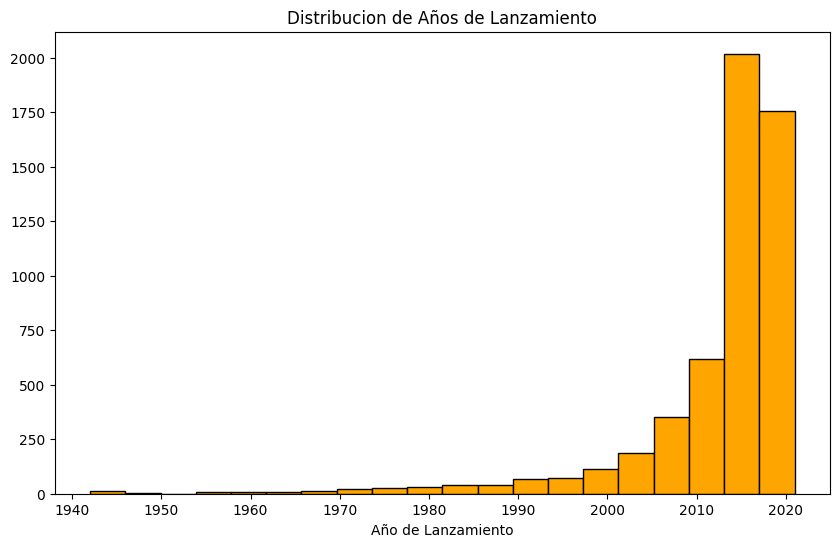

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=20, color='orange', edgecolor='black')
plt.title('Distribucion de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.show()


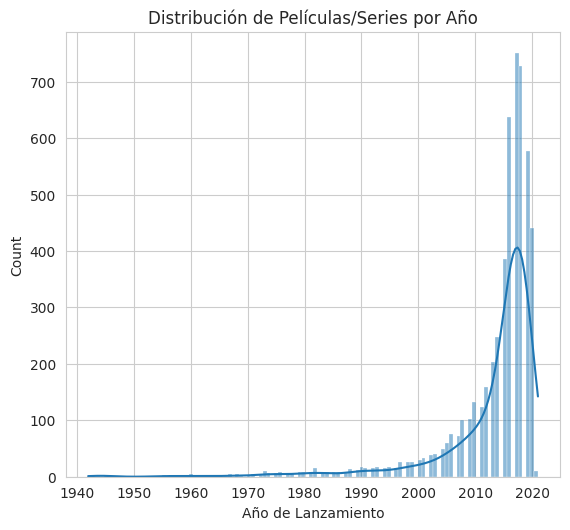

In [21]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

En el histograma se observa que hubo un incremento masivo que empieza a subir del 2010 al 2020, en este ultimo año influyo mucho que llegó la pandemia y se empezara a consumir mucho contenido de la plataforma de striming Netflix

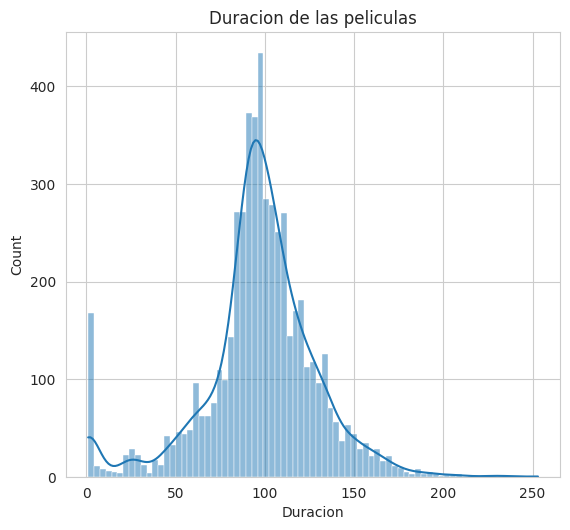

In [22]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['duration'], kde=True)
plt.title('Duracion de las peliculas')
plt.xlabel('Duracion')

plt.tight_layout()
plt.show()

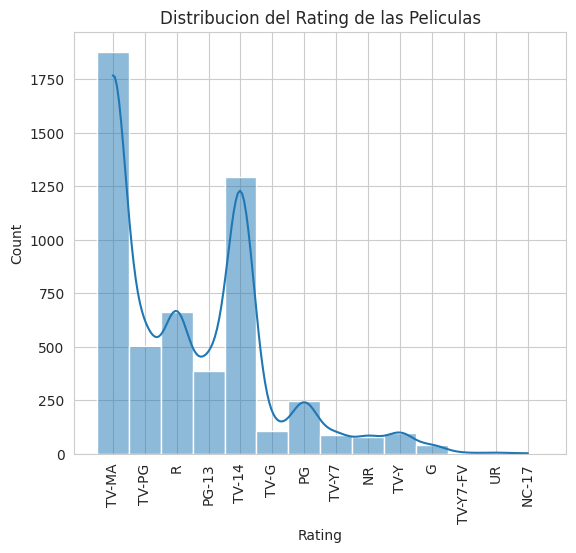

In [23]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['rating'], kde=True)
plt.title('Distribucion del Rating de las Peliculas')
plt.xlabel('Rating')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Distribucion de duraciones

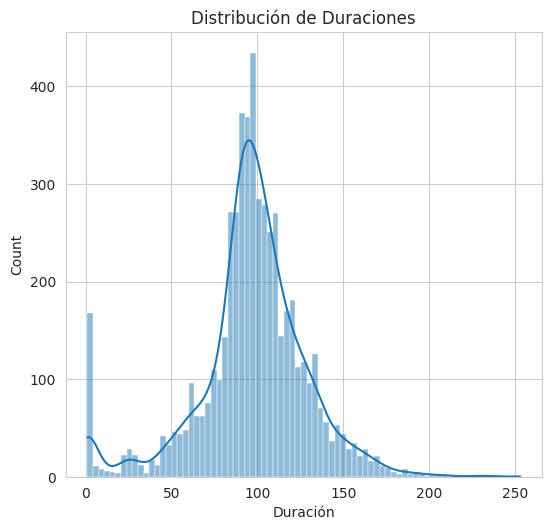

In [24]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de Duraciones')
plt.xlabel('Duración')


plt.tight_layout()

plt.show()

Distribución de clasificaciones

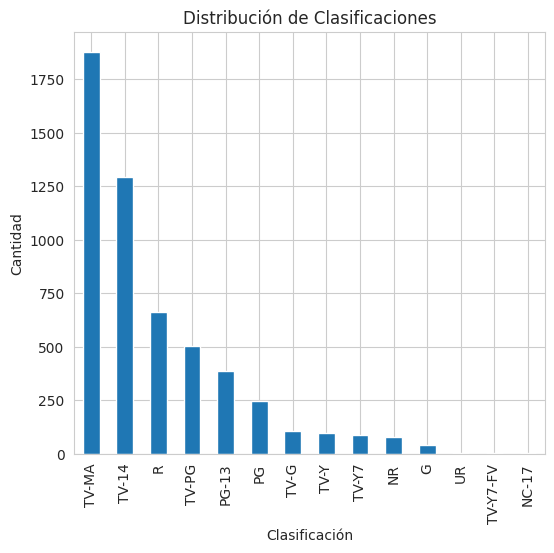

In [25]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

Proporcion de peliculas vs series

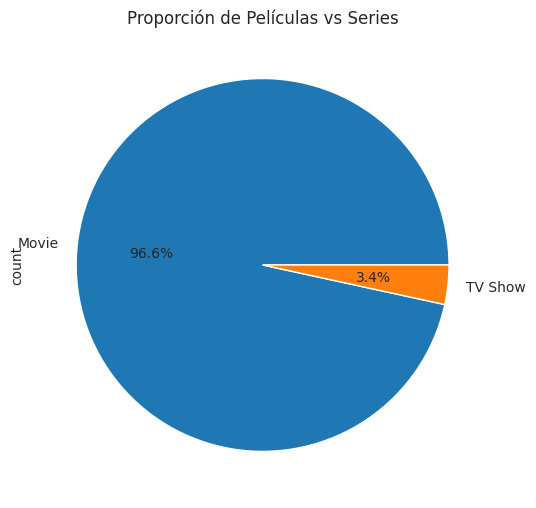

In [29]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()


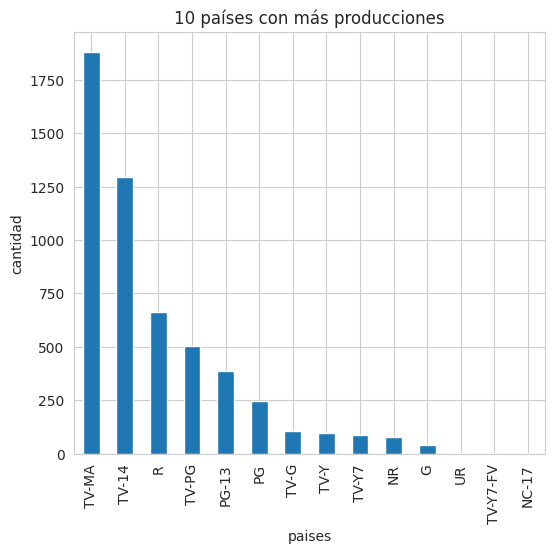

In [30]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('10 países con más producciones')
plt.xlabel('paises')
plt.ylabel('cantidad')


plt.tight_layout()
plt.show()

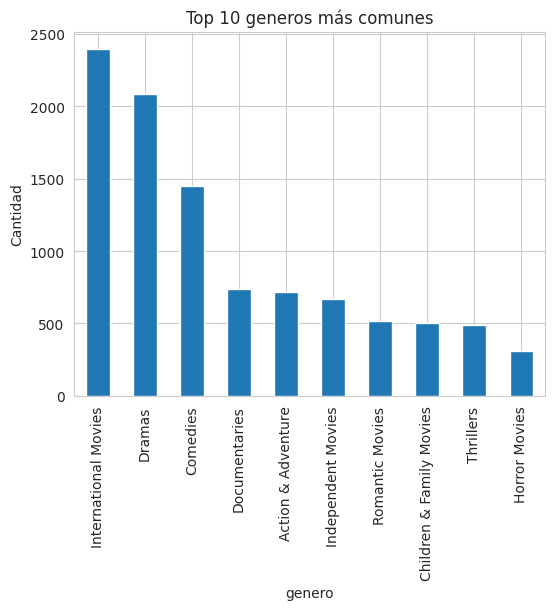

In [31]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 generos más comunes')
plt.xlabel('genero')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()


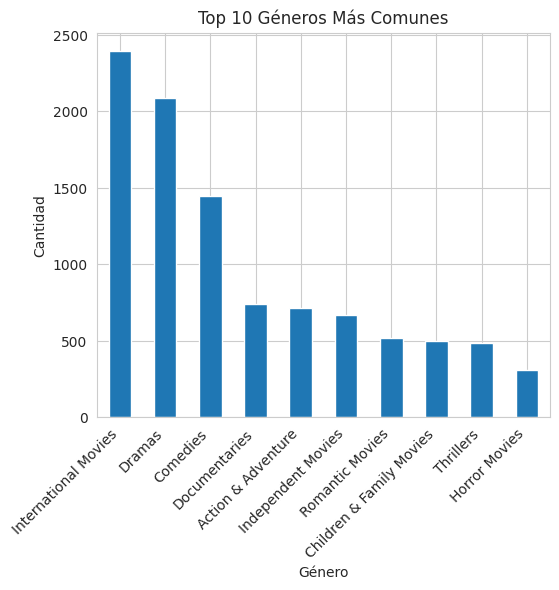

In [32]:
#Maestra
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

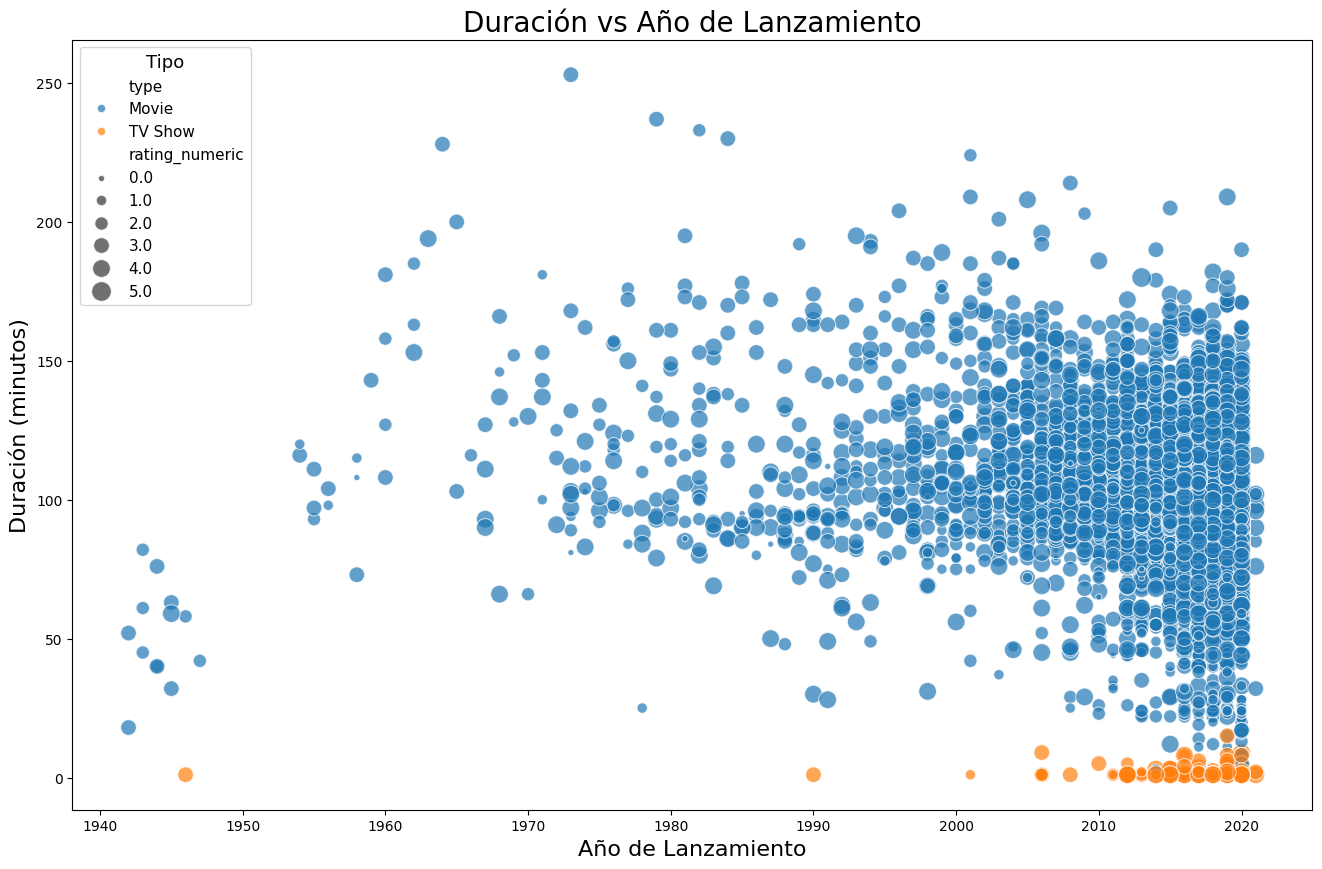

In [19]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type', size='rating_numeric', sizes=(20, 200), alpha=0.7)
plt.title('Duración vs Año de Lanzamiento', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Duración (minutos)', fontsize=16)
plt.legend(title='Tipo', title_fontsize='13', fontsize='11')
plt.show()

In [ ]:
#otra

In [ ]:

#Mapa de correlaciones numericas, mapa de calor
numeric_columns = tips.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()

In [ ]:
#Grafico de lineas para mostrar tendencias
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='sin(x)'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', name='cos(x)'))
fig.update_layout(title='Gráfico de líneas interactivo: sin(x) y cos(x)',
                  xaxis_title='x',
                  yaxis_title='y')
fig.show()


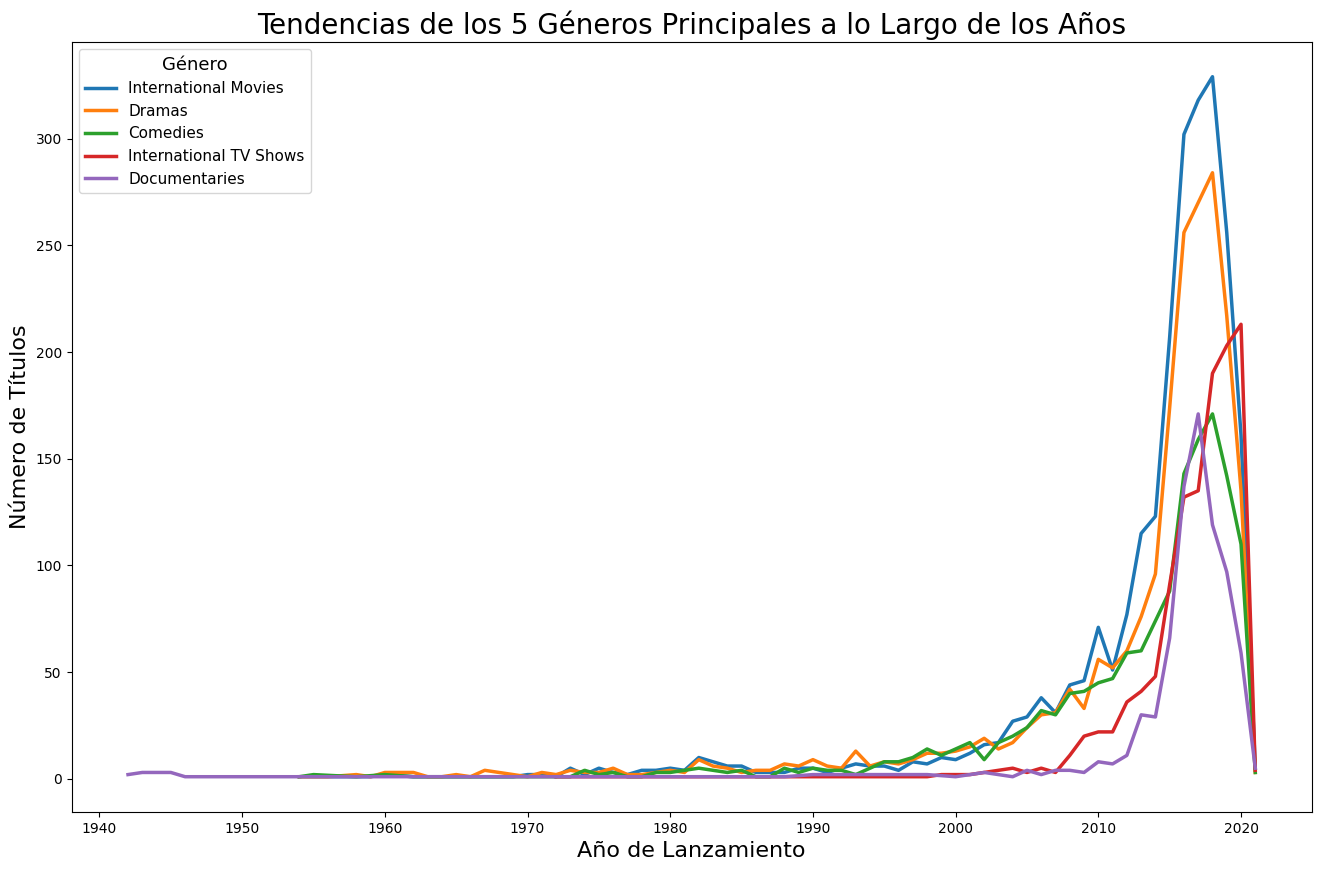

In [ ]:
#Grafico de lineas para
# Se procesa la columna de géneros
df['genres'] = df['genres'].str.split(', ')
genres_df = df.explode('genres')

top_genres = genres_df['genres'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for genre in top_genres:
    genre_data = genres_df[genres_df['genres'] == genre].groupby('release_year').size()
    plt.plot(genre_data.index, genre_data.values, label=genre, linewidth=2.5)

plt.title('Tendencias de los 5 Géneros Principales a lo Largo de los Años', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=16)
plt.ylabel('Número de Títulos', fontsize=16)
plt.legend(title='Género', title_fontsize='13', fontsize='11')
plt.show()